# Objective
To predict the concrete strength using the data available in file concrete_data.xls. Apply feature engineering and model tuning to obtain 80% to 95% of R2score.

**Import Libraries and load dataset**

In [55]:
#Import all the necessary modules
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [3]:
c_df = pd.read_csv('concrete.csv')

In [4]:
c_df.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


**1. Univariate analysis**

In [5]:
#Shape
print(c_df.shape)
# Data Types
print(c_df.info())
#Check for nulls
print(c_df.isnull().sum())

(1030, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB
None
cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64


In [6]:
#Convert strength into int64 for fixing the float continues issues
concrete_df = c_df.copy(True)
concrete_df['strength'] = concrete_df['strength'] * 100;
concrete_df.strength = concrete_df.strength.astype('int64') 
concrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 72.5 KB


In [7]:
concrete_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.0,192.375,272.9,350.00,540.0
slag,1030.0,73.895825,86.279342,0.0,0.000,22.0,142.95,359.4
ash,1030.0,54.188350,63.997004,0.0,0.000,0.0,118.30,200.1
water,1030.0,181.567282,21.354219,121.8,164.900,185.0,192.00,247.0
superplastic,1030.0,6.204660,5.973841,0.0,0.000,6.4,10.20,32.2
coarseagg,1030.0,972.918932,77.753954,801.0,932.000,968.0,1029.40,1145.0
fineagg,1030.0,773.580485,80.175980,594.0,730.950,779.5,824.00,992.6
age,1030.0,45.662136,63.169912,1.0,7.000,28.0,56.00,365.0
strength,1030.0,3581.733010,1670.568314,233.0,2371.000,3444.5,4613.50,8260.0


In [8]:
#print(bank_df.head(10))
concrete_df.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497831
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134821
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289636
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366080
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164928
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167238
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328881
strength,0.497831,0.134821,-0.105755,-0.289636,0.366080,-0.164928,-0.167238,0.328881,1.000000


AxesSubplot(0.125,0.125;0.775x0.755)


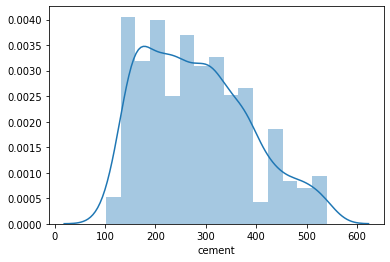

In [9]:
import seaborn as sns
#sns.set(style="ticks", color_codes=True)
#g = sns.pairplot(bank_df)
print(sns.distplot(concrete_df['cement']));

AxesSubplot(0.125,0.125;0.775x0.755)


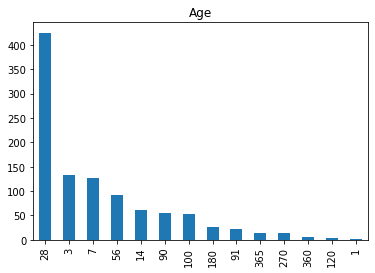

In [10]:
print(concrete_df['age'].value_counts().plot.bar(title='Age'))

<b>
 Conclusions after Univerate Analysis
    <ol>
        <li>
            Data doesn't not have null values
        </li>

</ol>
    </b>
    

**2. Bivariate analysis**

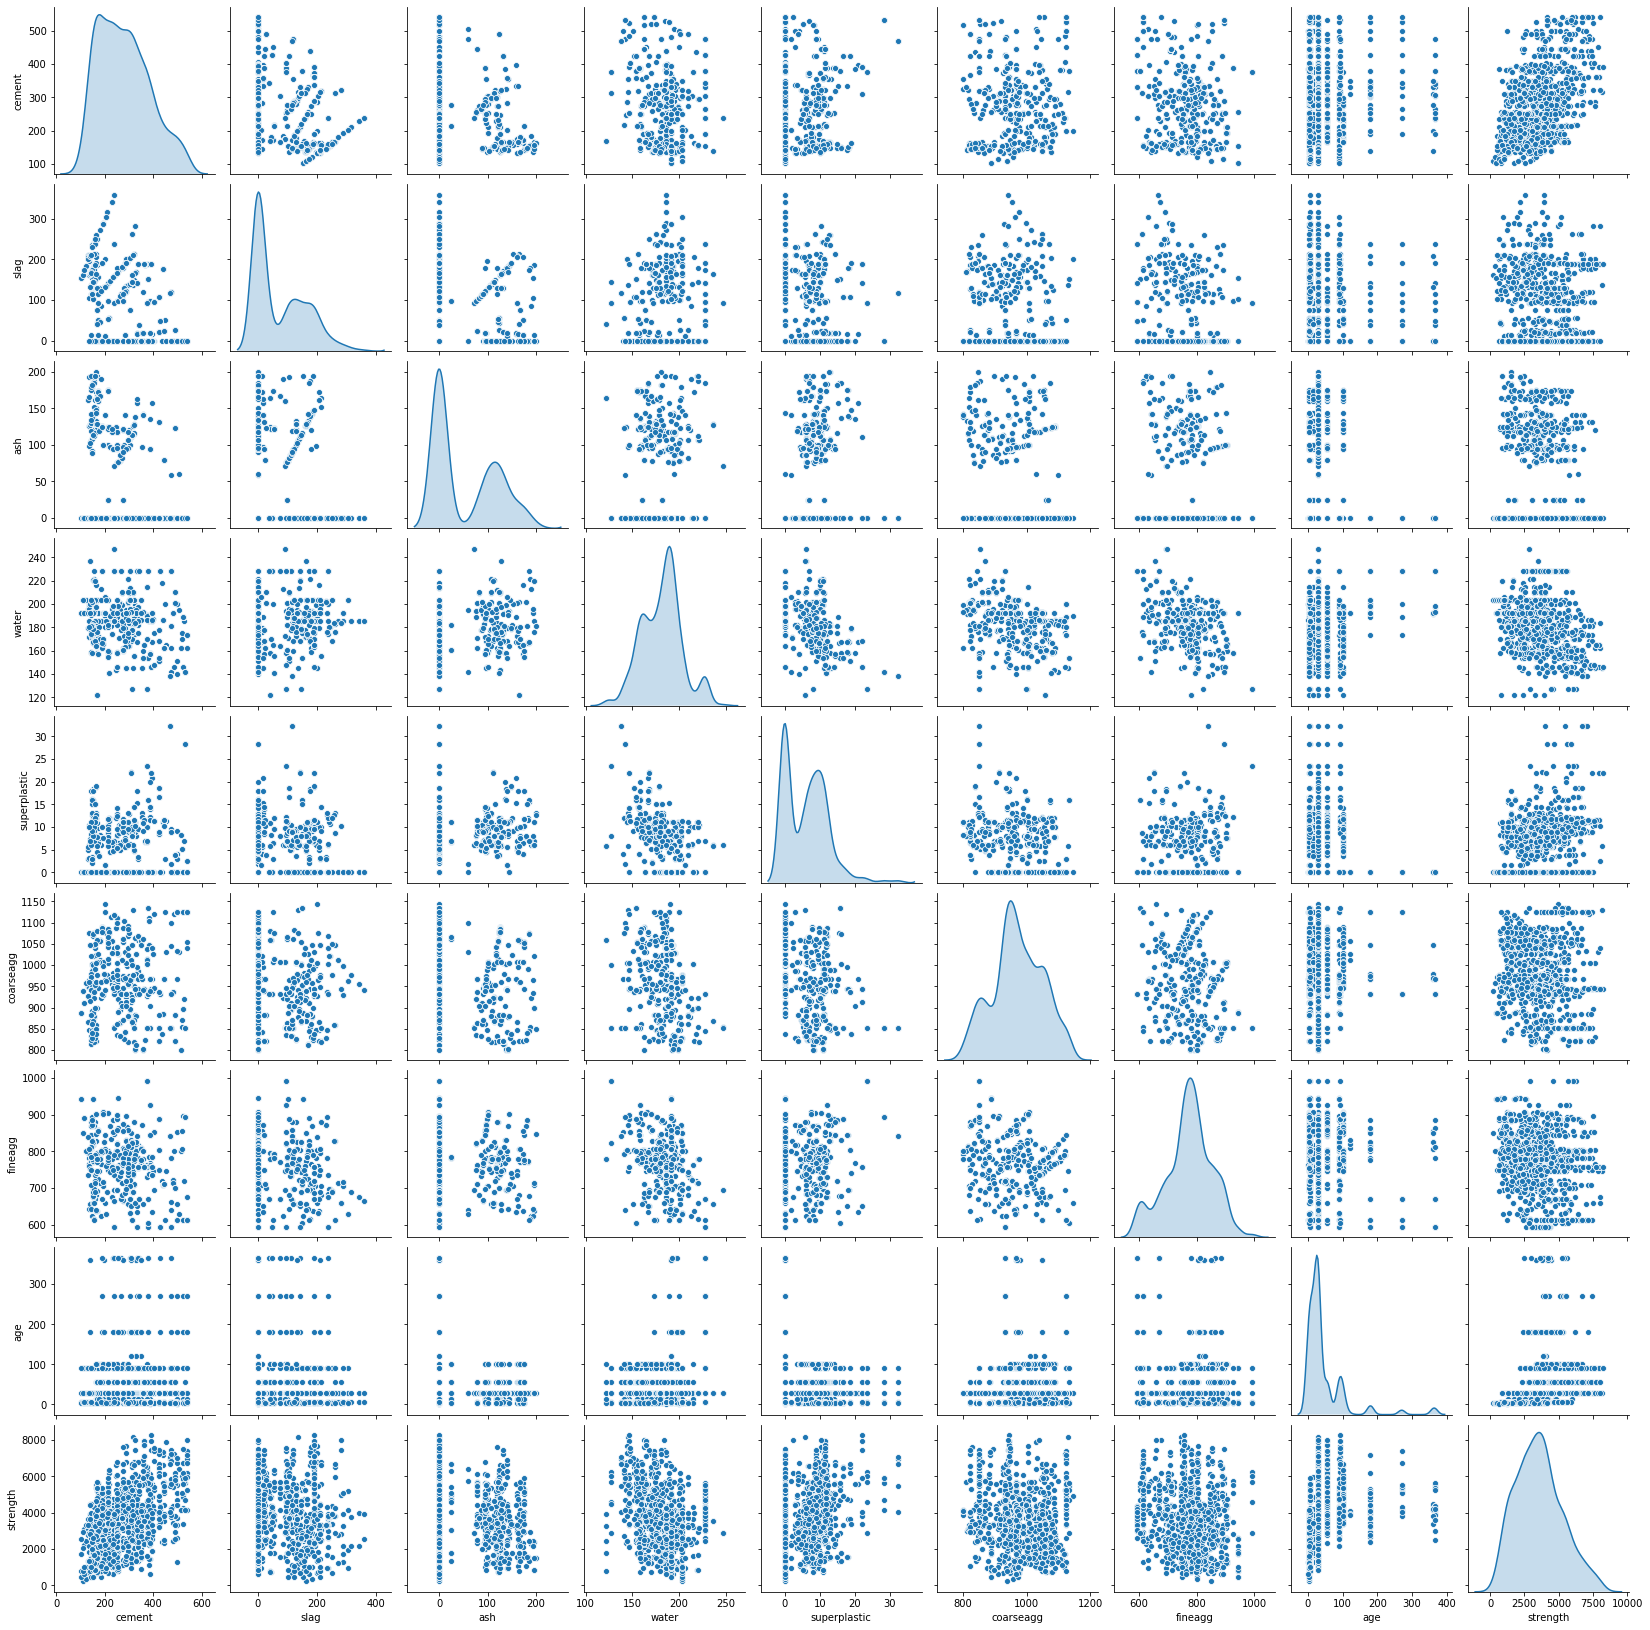

In [11]:
import seaborn as sns

sns.pairplot(concrete_df , hue=None , diag_kind = 'kde')
plt.show()

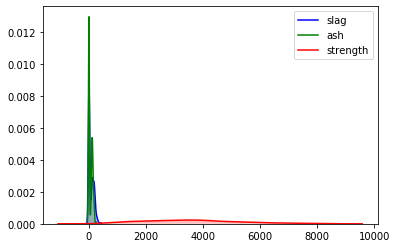

In [12]:
import seaborn as sns
 
# plot of 2 variables
p1=sns.kdeplot(concrete_df['slag'], shade=True, color="b")
p1=sns.kdeplot(concrete_df['ash'], shade=True, color="g")
p1=sns.kdeplot(concrete_df['strength'], shade=True, color="r")

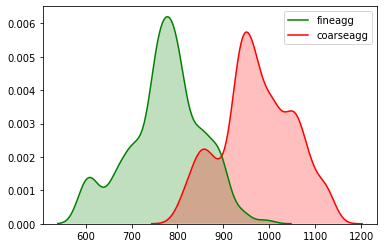

In [13]:
import seaborn as sns
 
# plot of 2 variables
p1=sns.kdeplot(concrete_df['fineagg'], shade=True, color="g")
p1=sns.kdeplot(concrete_df['coarseagg'], shade=True, color="r")

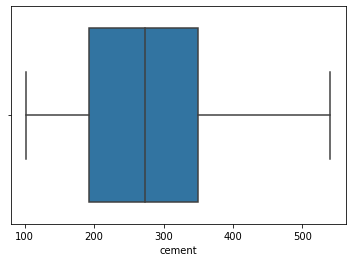

In [14]:
sns.boxplot(x=concrete_df['cement'])

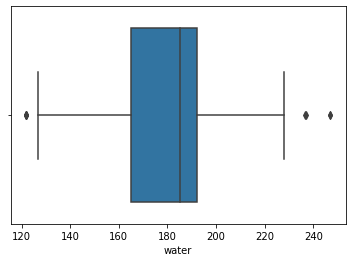

In [15]:
sns.boxplot(x=concrete_df['water'])

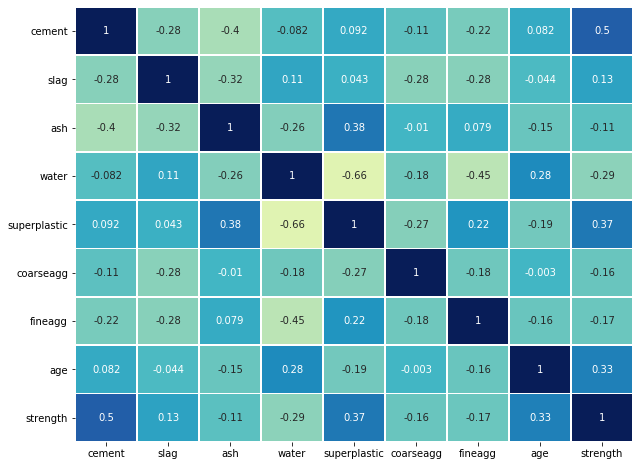

In [16]:
plt.figure(figsize=(10,8))

sns.heatmap(concrete_df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()

<b>
 Conclusions after Bivariate Analysis
    <ol>
        <li>
            Slag and Ash seems to have close relationship. if one increases other increases as well
        </li>
        <li>
            Strength seems to increase with Slag and Ash, however this is needs to be fully confirmed
        </li>
        <li>
            FineAgg and CoarseAgg overlap little bit. The data need to find range.
        </li>
</ol>
    </b>
    

**3. Feature Engineering techniques**

In [17]:
dff=pd.get_dummies(concrete_df, drop_first=True)

In [18]:
#Shape
print(dff.shape)
# Data Types
print(dff.info())

(1030, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 72.5 KB
None


In [19]:
# Split Train/Test data 70:30 ratio
from sklearn.model_selection import train_test_split

y = dff['strength']
X = dff.loc[:, dff.columns != 'strength']

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=42,)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((721, 8), (309, 8), (721,), (309,))

In [20]:
#Build RF Model
#from sklearn.ensemble import RandomForestRegressor 
#rf = RandomForestRegressor(max_depth=2, random_state=0) 
#rfm=rf.fit(X_train, y_train)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)
rfm=rf.fit(X_train, y_train)

In [21]:
preds = rf.predict([[0, 0, 0, 0,0,0,0,0]])
y_pred=rf.predict(X_test)

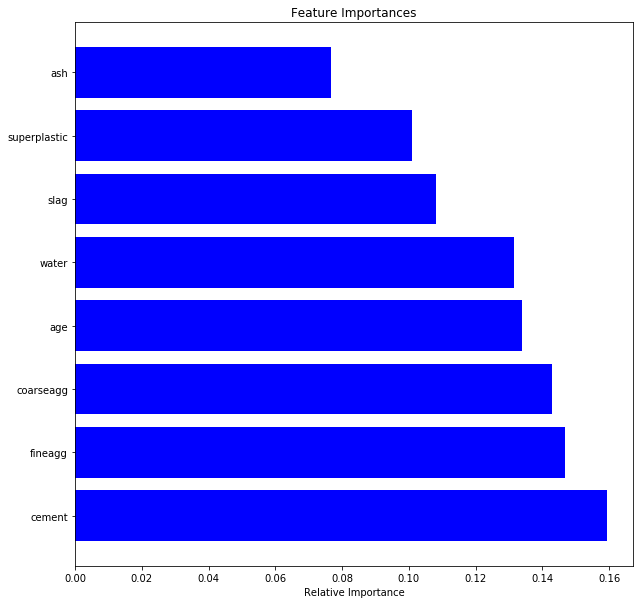

In [22]:
# View a list of the features and their importance scores
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1][:15]
a = dff.columns[:]
features= a.drop('strength',1)
#plot it
plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

**4. Modelling**

In [23]:
X = concrete_df.iloc[:, 1:8].values 
y = concrete_df.iloc[:, 8].values 
print(X.shape)
print(y.shape)
print(concrete_df.info())

(1030, 7)
(1030,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 72.5 KB
None


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [33]:
#PCA - to reduce dimensions
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
from sklearn.linear_model import LinearRegression 
from sklearn.pipeline import Pipeline 

pipe_lr = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components=3)), ('clf', LinearRegression())]) 
pipe_lr.fit(X_train, y_train) 
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.113


In [34]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
print ("Linear Regression model:", (regression_model.coef_))

Linear Regression model: [[ 5.02288179e-15  1.34774158e+03  1.01455250e+03  6.05843658e+02
  -1.56579377e+02  4.25131224e+02  1.23645830e+02  2.53764472e+02
   1.49772328e+03  7.59774583e+01  1.15700257e+02 -3.90075202e+02
  -1.73744832e+02  3.28909788e+01  6.17056543e+01  2.91090457e+02
   1.76372511e+02 -1.63195169e+02  5.22016089e+01  3.68160409e+01
   2.08098681e+02  4.26423689e+02 -2.31706597e+02 -2.32928401e+02
   2.58898074e+01  1.97878978e+02  6.75687319e+02  1.96652967e+02
  -1.09576251e+02 -3.09739687e+01 -9.60974493e+01  1.77622505e+02
   9.91028071e+01  2.40697386e+02  1.63013008e+02 -3.01076369e+01
   1.85017820e+02]]


In [35]:
print('Regression Score')
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

Regression Score
0.7549527979978068
0.7444768407105449


In [36]:
from sklearn import preprocessing

X = concrete_df.drop('strength', axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = concrete_df[['strength']]


X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)  # ideally the training and test should be 

y_scaled = preprocessing.scale(y)
y_scaled = pd.DataFrame(y_scaled, columns=y.columns)  # ideally the training and test should be 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.30, random_state=1)

In [37]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2, interaction_only=True)
X_poly = poly.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

(721, 37)

In [38]:
#Fit a simple non regularized linear model on poly features-
regression_model.fit(X_train, y_train)
print(regression_model.coef_[0])

[ 5.02288179e-15  1.34774158e+03  1.01455250e+03  6.05843658e+02
 -1.56579377e+02  4.25131224e+02  1.23645830e+02  2.53764472e+02
  1.49772328e+03  7.59774583e+01  1.15700257e+02 -3.90075202e+02
 -1.73744832e+02  3.28909788e+01  6.17056543e+01  2.91090457e+02
  1.76372511e+02 -1.63195169e+02  5.22016089e+01  3.68160409e+01
  2.08098681e+02  4.26423689e+02 -2.31706597e+02 -2.32928401e+02
  2.58898074e+01  1.97878978e+02  6.75687319e+02  1.96652967e+02
 -1.09576251e+02 -3.09739687e+01 -9.60974493e+01  1.77622505e+02
  9.91028071e+01  2.40697386e+02  1.63013008e+02 -3.01076369e+01
  1.85017820e+02]


In [39]:
print('Regression Score')
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

Regression Score
0.7549527979978068
0.7444768407105449


**Linear Regression is not producing greater accuracy Polynomial\Quadratic performs much better**

In [43]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
print ("Linear Regression model:", (regression_model.coef_))
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))
lasso = Lasso(alpha=0.2)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Linear Regression model: [[ 5.02288179e-15  1.34774158e+03  1.01455250e+03  6.05843658e+02
  -1.56579377e+02  4.25131224e+02  1.23645830e+02  2.53764472e+02
   1.49772328e+03  7.59774583e+01  1.15700257e+02 -3.90075202e+02
  -1.73744832e+02  3.28909788e+01  6.17056543e+01  2.91090457e+02
   1.76372511e+02 -1.63195169e+02  5.22016089e+01  3.68160409e+01
   2.08098681e+02  4.26423689e+02 -2.31706597e+02 -2.32928401e+02
   2.58898074e+01  1.97878978e+02  6.75687319e+02  1.96652967e+02
  -1.09576251e+02 -3.09739687e+01 -9.60974493e+01  1.77622505e+02
   9.91028071e+01  2.40697386e+02  1.63013008e+02 -3.01076369e+01
   1.85017820e+02]]
Ridge model: [[   0.         1332.27309354  998.81986849  592.03641466 -167.68207864
   424.34727868  114.72033052  240.29885434 1494.43524138   75.06695983
   115.79876754 -385.52495922 -172.02747593   33.47773576   61.68705425
   276.42149176  174.58814342 -160.88408471   52.95174119   35.78056609
   207.19415247  415.05594981 -226.69245269 -232.69169459   

In [44]:
print('Regression Score')
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))
print('Ridge Score')
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))
print('Lasso Score')
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

Regression Score
0.7549527979978068
0.7444768407105449
Ridge Score
0.7549412953902497
0.7444437831414799
Lasso Score
0.7549448235754935
0.7444466878974


**Hyper Parameter Tuning**

In [71]:
X = concrete_df.iloc[:, 1:8].values 
y = concrete_df.iloc[:, 8].values 

In [72]:
from scipy.stats import randint as sp_randint
from sklearn.datasets import load_digits
clf = RandomForestClassifier(n_estimators=50)

In [73]:
# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [74]:
# run randomized search
samples = 10  # number of random samples 
randomCV = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=samples) #default cv = 3

In [75]:
randomCV.fit(X, y)

print(randomCV.best_params_)


{'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 2, 'min_samples_leaf': 2, 'min_samples_split': 8}


In [108]:
#split the dataset into train and test set
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [109]:
from sklearn.neighbors import KNeighborsClassifier
### Number of nearest neighbors
knn_clf = KNeighborsClassifier()

In [110]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [111]:
from sklearn.metrics import accuracy_score

In [112]:
param_grid = {'n_neighbors': list(range(1,9)),
             'algorithm': ('auto', 'ball_tree', 'kd_tree' , 'brute') }
rs = RandomizedSearchCV(knn_clf,param_grid,cv=10)

In [ ]:
rs.fit(X_train, y_train)